# Build a model to identify `SPAM or HAM`

In [1]:
import pandas as pd
import numpy as np

# This will help in train test split
from sklearn.model_selection import train_test_split

# This will help in removing the stop words and to create a word bag
from sklearn.feature_extraction.text import CountVectorizer

# This will help in creating the models for identifying SPAM or HAM
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn import metrics

# This is to create the confusion metric
from sklearn.metrics import confusion_matrix

# This is to create the ROC curve
from sklearn.metrics import roc_curve, auc

# This is to create plots and graphs
import matplotlib.pyplot as plt
import seaborn as sns

## Import the file

In [2]:
df = pd.read_csv("smsspamcollection.csv", names=["Class", "sms"])
df.head(3)

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [3]:
# count of spam and ham
df.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [4]:
# percentage of spam and ham
df.Class.value_counts() * 100 / len(df)

ham     86.593683
spam    13.406317
Name: Class, dtype: float64

### Map Ham to 0 and Spam to 1

In [5]:
df['Class'] = df.Class.map({'spam': 1, 'ham': 0})
df.head()

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Divide the X and y

In [6]:
X_df = df.sms
y_df = df.Class

X_df.head(), y_df.head()

(0    Go until jurong point, crazy.. Available only ...
 1                        Ok lar... Joking wif u oni...
 2    Free entry in 2 a wkly comp to win FA Cup fina...
 3    U dun say so early hor... U c already then say...
 4    Nah I don't think he goes to usf, he lives aro...
 Name: sms, dtype: object,
 0    0
 1    0
 2    1
 3    0
 4    0
 Name: Class, dtype: int64)

In [7]:
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df, y_df, train_size=0.7, 
                                                                test_size=0.3, random_state=42)

X_df_train.shape, X_df_test.shape, y_df_train.shape, y_df_test.shape

((3900,), (1672,), (3900,), (1672,))

In [8]:
X_df_train.head()

708     Quite late lar... Ard 12 anyway i wun b drivin...
4338                        on a Tuesday night r u 4 real
5029    Go chase after her and run her over while she'...
4921     G says you never answer your texts, confirm/deny
2592         Still work going on:)it is very small house.
Name: sms, dtype: object

## Create Bag words with stop words

In [9]:
vect = CountVectorizer(stop_words='english')

### Transform X train and test

In [10]:
# vect.fit(X_df_train)
# len(vect.vocabulary_.keys())

In [11]:
X_train_transformed = vect.fit_transform(X_df_train)
X_test_transformed = vect.transform(X_df_test)

In [12]:
print(X_train_transformed[0])

  (0, 5026)	1
  (0, 3635)	1
  (0, 3630)	1
  (0, 944)	1
  (0, 260)	1
  (0, 6908)	1
  (0, 2222)	1


In [13]:
X_train_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Evaluate the SPAM or HAM using MultinomialNB model

In [14]:
mnb = MultinomialNB()

### Fit the X_train

In [15]:
mnb.fit(X_train_transformed, y_df_train)

MultinomialNB()

### Predict the Y using the trained model

In [16]:
y_pred_test_mnb = mnb.predict(X_test_transformed)
y_pred_test_prb = mnb.predict_proba(X_test_transformed)

In [17]:
metrics.accuracy_score(y_true=y_df_test, y_pred=y_pred_test_mnb)

0.9874401913875598

In [18]:
confusion = confusion_matrix(y_df_test, y_pred_test_mnb)
confusion

array([[1438,   10],
       [  11,  213]])

In [19]:
TN_mnb = confusion[0, 0]
FP_mnb = confusion[0, 1]
FN_mnb = confusion[1, 0]
TP_mnb = confusion[1, 1]

### Accuracy, Specificity, Precision and Sensitivity

In [20]:
total_mnb = float(TN_mnb + TP_mnb + FP_mnb + FN_mnb)

accuracy_mnb = (TN_mnb + TP_mnb) / total_mnb
sensistivity_mnb = TP_mnb / float(FN_mnb + TP_mnb)
specificity_mnb = TN_mnb / float(TN_mnb + FP_mnb)
precision_mnb = TP_mnb / float(FP_mnb + TP_mnb)

print("accuracy \t{:0.2f}%".format(accuracy_mnb * 100))
print("sensitivity \t{:0.2f}%".format(sensistivity_mnb * 100))
print("specificity \t{:0.2f}%".format(specificity_mnb * 100))
print("precision \t{:0.2f}%".format(precision_mnb * 100))

accuracy 	98.74%
sensitivity 	95.09%
specificity 	99.31%
precision 	95.52%


### Score: Precision, Recall and F1

In [21]:
print("Precision \t\t{:0.2f}%".format(metrics.precision_score(y_true=y_df_test, y_pred=y_pred_test_mnb) * 100))
print("Recall/ Sensitivity \t{:0.2f}%".format(metrics.recall_score(y_true=y_df_test, y_pred=y_pred_test_mnb) * 100))
print("F1 \t\t\t{:0.2f}%".format(metrics.f1_score(y_true=y_df_test, y_pred=y_pred_test_mnb) * 100))


Precision 		95.52%
Recall/ Sensitivity 	95.09%
F1 			95.30%


### ROC curve

In [22]:
fpr_mnb, tpr_mnb, threshold_mnb = roc_curve(y_true=y_df_test, y_score=y_pred_test_prb[:,1])
fpr_mnb[:5], tpr_mnb[:5], threshold_mnb[:5]

(array([0., 0., 0., 0., 0.]),
 array([0.        , 0.27678571, 0.32142857, 0.33928571, 0.34375   ]),
 array([inf,  1.,  1.,  1.,  1.]))

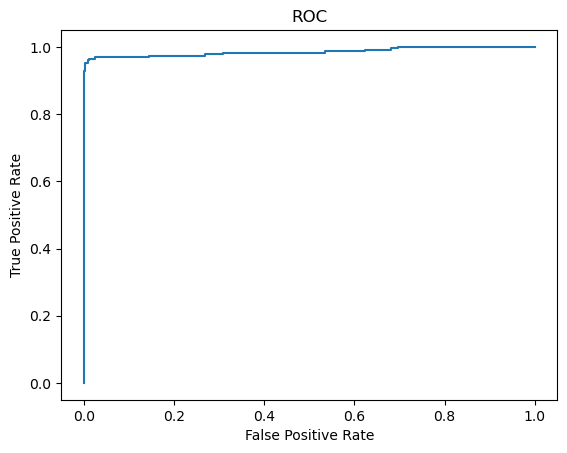

In [23]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(fpr_mnb, tpr_mnb)

In [24]:
roc_auc = auc(fpr_mnb, tpr_mnb)
print("ROC area under the curve: {:0.2f}%".format(roc_auc * 100))

ROC area under the curve: 98.52%


## Evaluate the SPAM or HAM using the Bernoulli

In [25]:
bnb = BernoulliNB()

In [26]:
bnb.fit(X_train_transformed, y_df_train)

BernoulliNB()

In [27]:
y_pred_test_bnb = bnb.predict(X_test_transformed)
y_pred_test_prb_bnb = bnb.predict_proba(X_test_transformed)

In [28]:
confusion_bnb = confusion_matrix(y_true=y_df_test, y_pred=y_pred_test_bnb)
confusion_bnb

array([[1447,    1],
       [  43,  181]])

In [29]:
TN_bnb = confusion_bnb[0, 0]
FP_bnb = confusion_bnb[0, 1]
FN_bnb = confusion_bnb[1, 0]
TP_bnb = confusion_bnb[1, 1]

### Precision, Accuracy, Specificity, Sensitivity

In [30]:
accuracy_bnb = (TN_bnb + TP_bnb) / float(TP_bnb + TN_bnb + FP_bnb + FN_bnb)
sensistivity_bnb = TP_bnb / float(FN_bnb + TP_bnb)
specificity_bnb = TN_bnb / float(TN_bnb + FP_bnb)
precision_bnb = TP_bnb / float(FP_bnb + TP_bnb)

print("accuracy \t{:0.2f}%".format(accuracy_bnb * 100))
print("sensitivity \t{:0.2f}%".format(sensistivity_bnb * 100))
print("specificity \t{:0.2f}%".format(specificity_bnb * 100))
print("precision \t{:0.2f}%".format(precision_bnb * 100))

accuracy 	97.37%
sensitivity 	80.80%
specificity 	99.93%
precision 	99.45%


In [31]:
print("Precision \t\t{:0.2f}%".format(metrics.precision_score(y_true=y_df_test, y_pred=y_pred_test_bnb) * 100))
print("Recall/ Sensitivity \t{:0.2f}%".format(metrics.recall_score(y_true=y_df_test, y_pred=y_pred_test_bnb) * 100))
print("F1 \t\t\t{:0.2f}%".format(metrics.f1_score(y_true=y_df_test, y_pred=y_pred_test_bnb) * 100))

Precision 		99.45%
Recall/ Sensitivity 	80.80%
F1 			89.16%


In [32]:
fpr_bnb, tpr_bnb, threshold_bnb = roc_curve(y_true=y_df_test, y_score=y_pred_test_prb_bnb[:,1])

### Roc Curve

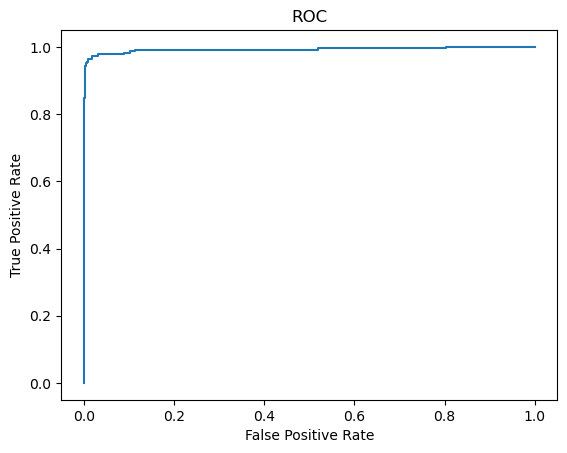

In [33]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(fpr_bnb, tpr_bnb)

In [34]:
roc_auc_bnb = auc(fpr_bnb, tpr_bnb)
print("ROC area under the curve: {:0.2f}%".format(roc_auc_bnb * 100))

ROC area under the curve: 99.20%
